#### Diagrama de Interacción de un muro T

In [63]:
import numpy as np 
import matplotlib.pyplot as plt 

Datos de entrada

In [64]:
B = 2.9 # aleta
tf = 0.1 # espesor de la aleta
Ht = 3.05 # altura total
tw = 0.1 # espesor del alma
fc = 28000 # fc en KPa del concreto
fy = 420000 # fy del acero en KPa

In [65]:
h2 = Ht-tf
ybarra = ((B*tf*tf/2)+(h2*tw*(tf+h2/2)))/(B*tf+h2*tw)
print(ybarra)

0.819017094017094


In [66]:
Es = 200000000 # Modulo del acero en KPa
ey = fy/Es
def elastoplastico(es):
    sigma = es*Es 
    if sigma > fy: 
        sigma = fy 
    if sigma < -fy: 
        sigma = -fy 
    return sigma 

vec_elastoplastico = np.vectorize(elastoplastico)    

In [67]:
ee = np.linspace(-0.005,0.005,1000)
ss = vec_elastoplastico(ee)

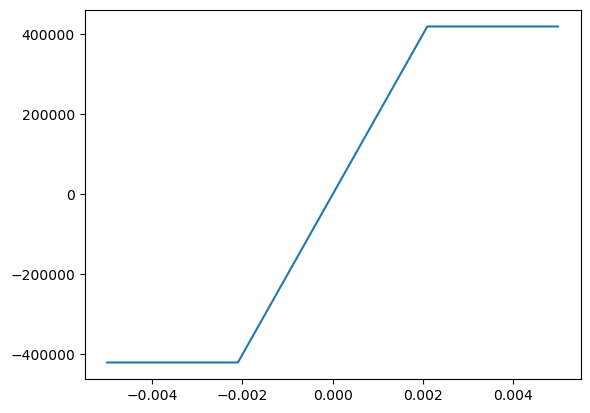

In [68]:
plt.plot(ee,ss)

In [69]:
c = np.linspace(0.01,1.5*Ht,1000)
P = []
M = []
db = 0.7/100
ab = 3.1416*db**2/4
pos_acero = np.array([0.05,0.15,0.30,0.45,0.6,0.75,0.9,1.05,1.2,1.35,1.50,1.65,1.8,1.95,2.1,2.25,2.4,2.55,2.7,2.85,3.00])
area_acero = np.array([19,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])*ab


In [70]:
beta = 0.85
ec = 0.003
for ci in c:
    epsilon = ec*(ci - pos_acero)/ci
    fs = vec_elastoplastico(epsilon)
    Fs = fs*area_acero
    Ms = Fs*(ybarra-pos_acero)
    Macero = np.sum(Ms)
    Pacero = np.sum(Fs)
    if beta*ci < tf:
        Cc = 0.85*fc*(B*beta*ci)
        Mc = Cc*(ybarra-beta*ci/2)
    elif beta*ci > Ht:
        Cc1 = 0.85*fc*(B*tf)
        Cc2 = 0.85*fc*h2*tw
        Cc = Cc1 + Cc2
        yc1 = tf/2
        yc2 = tf + h2/2
        Mc = Cc1*(ybarra - yc1) + Cc2*(ybarra - yc2)
    else:
        Cc1 = 0.85*fc*(B*tf)
        Cc2 = 0.85*fc*(beta*ci - tf)*tw
        Cc = Cc1 + Cc2
        yc1 = tf/2
        yc2 = (beta*ci + tf)/2
        Mc = Cc1*(ybarra - yc1) + Cc2*(ybarra - yc2)
    Ptotal = Cc + Pacero
    Mtotal = Mc + Macero
    P.append(Ptotal)
    M.append(Mtotal)


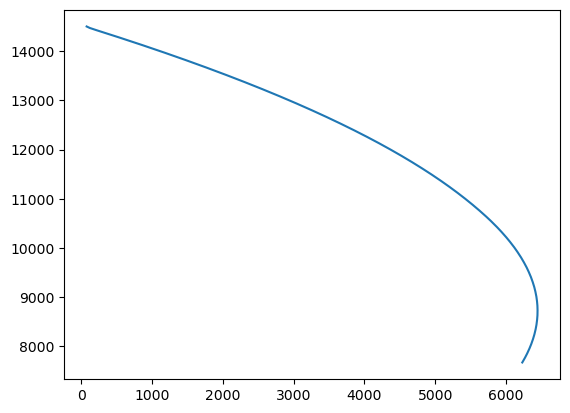

In [71]:
plt.plot(M[99:],P[99:])